In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', None)

In [2]:
loan_data = pd.read_csv('loan.csv', index_col=False, dtype='unicode')

In [3]:
#fetching the top 5 rows to understand the data
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN


In [4]:
#printing the shape of the dataset
loan_data.shape

(39717, 111)

In [5]:
#describe() function provides various parameters like count,unique etc for each columns
loan_data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,...,0,0,0,0,39020,39678,0,0,0,0
unique,39717,39717,885,1041,8205,2,371,15383,7,35,...,0,0,0,0,3,1,0,0,0,0
top,987930,823894,10000,10000,5000,36 months,10.99%,311.11,B,B3,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
freq,1,1,2833,2741,1309,29096,956,68,12020,2917,...,NaN,NaN,NaN,NaN,37339,39678,NaN,NaN,NaN,NaN


**DATA** **CLEANING**

In [6]:
#calculating the missing values percentage in each column
missing_values_percentage = loan_data.isnull().sum() * 100 / len(loan_data)
col_wise_missing_value_df = pd.DataFrame({'column_name': loan_data.columns,
                                 'missing_values_per_column_percentage': missing_values_percentage.round(2)})
col_wise_missing_value_df.sort_values('missing_values_per_column_percentage', inplace=True)
col_wise_missing_value_df.reset_index(drop=True)

,column_name,missing_values_per_column_percentage
0,id,0.00
1,earliest_cr_line,0.00
2,inq_last_6mths,0.00
3,open_acc,0.00
4,pub_rec,0.00
5,revol_bal,0.00
6,total_acc,0.00
7,initial_list_status,0.00
8,out_prncp,0.00
9,out_prncp_inv,0.00


In [7]:
#column or columns with maxiumun percentage of nans
columns_with_maximum_nans=list(col_wise_missing_value_df[col_wise_missing_value_df['missing_values_per_column_percentage']==max(col_wise_missing_value_df['missing_values_per_column_percentage'])]['column_name'])
print(columns_with_maximum_nans)

['num_bc_sats', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'mort_acc', 'num_bc_tl', 'num_tl_op_past_12m', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'mo_sin_rcnt_tl', 'num_il_tl', 'mo_sin_rcnt_rev_tl_op', 'verification_status_joint', 'mo_sin_old_il_acct', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'total_bc_limit', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_rev_tl_op', 'total_il_high_credit_

In [8]:
#dropping columns with maximum missing value percentage
updated_loan_data = loan_data.drop(columns_with_maximum_nans, axis=1)

In [9]:
#droping columns with more than 50per nans
updated_loan_data=updated_loan_data.drop(list(col_wise_missing_value_df[(col_wise_missing_value_df['missing_values_per_column_percentage']> 50) &(col_wise_missing_value_df['missing_values_per_column_percentage']<100)]['column_name']),axis=1)

In [10]:
#droping all unnecessary columns that aren't corelating with our target column loan_status
updated_loan_data = updated_loan_data.drop(['desc', 'member_id', 'id', 'url','emp_title','delinq_2yrs', 'inq_last_6mths', 'pub_rec', 'revol_bal', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'zip_code', 'pub_rec_bankruptcies', 'earliest_cr_line'], axis=1)

In [11]:
#checking the unique values of each column
updated_loan_data.nunique()

loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
purpose                          14
title                         19615
addr_state                       50
dti                            2868
open_acc                         40
revol_util                     1089
total_acc                        82
initial_list_status               1
collections_12_mths_ex_med        1
policy_code                       1
application_type                  1
acc_now_delinq                    1
chargeoff_within_12_mths    

In [12]:
#Removing all columns which contains only 1 distinct value
updated_loan_data=updated_loan_data.loc[:,updated_loan_data.apply(pd.Series.nunique) != 1]

In [13]:
#revalidating the unique values in a column after cleaning
updated_loan_data.nunique()

loan_amnt                885
funded_amnt             1041
funded_amnt_inv         8205
term                       2
int_rate                 371
installment            15383
grade                      7
sub_grade                 35
emp_length                11
home_ownership             5
annual_inc              5318
verification_status        3
issue_d                   55
loan_status                3
purpose                   14
title                  19615
addr_state                50
dti                     2868
open_acc                  40
revol_util              1089
total_acc                 82
dtype: int64

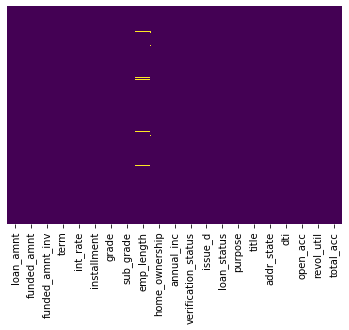

In [14]:
#further check of any missing values still existing 
sns.heatmap(updated_loan_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [15]:
#droping all rows with emp_length as null
updated_loan_data.emp_length.fillna(loan_data.emp_length.mode()[0], inplace = True)
updated_loan_data['home_ownership'].replace(to_replace = ['NONE'],value='OTHER',inplace = True)


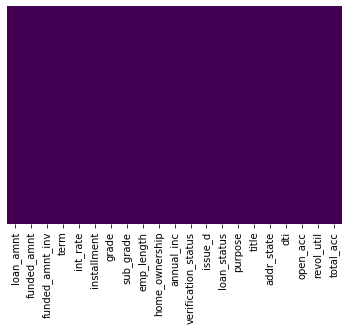

In [16]:
#verifying that the missing values are completely removed
sns.heatmap(updated_loan_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [17]:
# shape of the dataset after removing missing values and uncessary columns
updated_loan_data.shape

(39717, 21)

In [18]:
#converting the interest rate to a standard numeric type
updated_loan_data.int_rate = pd.to_numeric(updated_loan_data.int_rate.apply(lambda x : x.split('%')[0]))

In [19]:
#converting the employment_length column to a standard numeric type
updated_loan_data.emp_length = pd.to_numeric(updated_loan_data.emp_length.apply(lambda x: 0 if "<" in x else (x.split('+')[0] if "+" in x else x.split()[0])))


In [20]:
#converting into float type

numeric_columns = ['loan_amnt','funded_amnt','funded_amnt_inv','installment','annual_inc','dti']

updated_loan_data[numeric_columns] = updated_loan_data[numeric_columns].apply(pd.to_numeric)

In [21]:
#checking for the required loan status
dict(updated_loan_data['loan_status'].value_counts())

{'Fully Paid': 32950, 'Charged Off': 5627, 'Current': 1140}

In [22]:
#removing all records with status as current
updated_loan_data = updated_loan_data[updated_loan_data['loan_status'] !='Current']


In [23]:
#revalidating the loan status available after the cleanup
dict(updated_loan_data['loan_status'].value_counts())

{'Fully Paid': 32950, 'Charged Off': 5627}

In [24]:
# deriving month and year from the existing date column
df_month_year = updated_loan_data['issue_d'].str.partition("-", True)     
updated_loan_data['issue_month']=df_month_year[0]                       
updated_loan_data['issue_year']='20' + df_month_year[2]

**UNIVARIATE** **ANALYSIS**

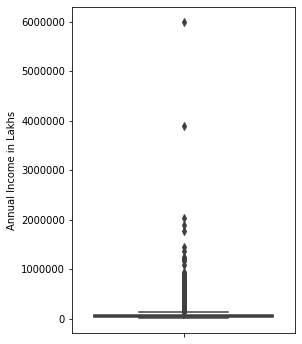

In [25]:
#box plot to check the range of annual income of majority of people applying for loan 
plt.figure(figsize=(4,6))
loan_status = sns.boxplot(y="annual_inc", data=updated_loan_data)
plt.ylabel('Annual Income in Lakhs')
plt.show()

**Inference**: 
Most of the loan seeking people are having annual income below 20 lakhs and only two people are above the common cluster. 
Those two can be the outliers

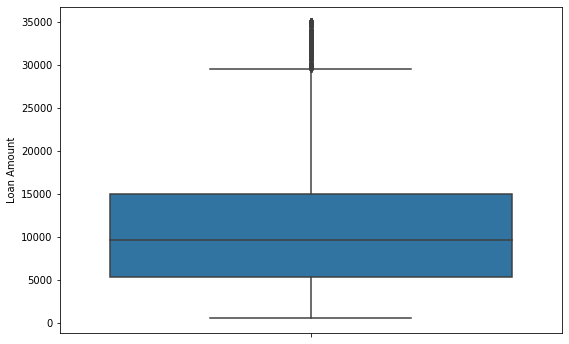

In [26]:
#box plot for loan amount
plt.figure(figsize=(9,6))
sns.boxplot( y=updated_loan_data["loan_amnt"] )
plt.ylabel('Loan Amount')
plt.show()

**Inference**: Loan Amount ranges from 0 to 35000 and mean of 10000



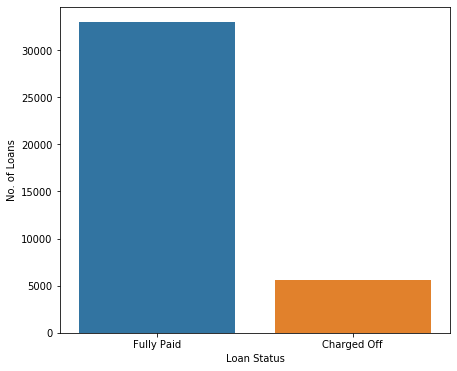

In [27]:
#count plot for Loan Status
plt.figure(figsize=(7,6))
loan_status = sns.countplot(x="loan_status", data=updated_loan_data)
loan_status.set(xlabel='Loan Status', ylabel='No. of Loans')
plt.show()

**Infrence**: From The graph, 

*   more than 30000 loans are fully paid 

*   we are having 5000 defaulters

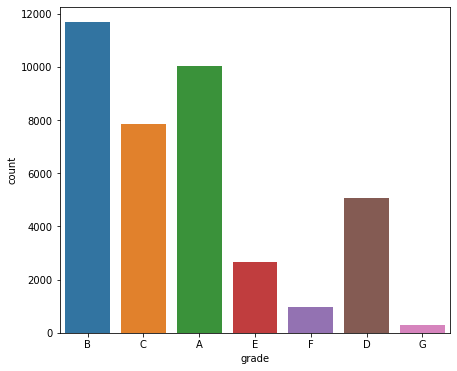

In [28]:
plt.figure(figsize=(7,6))
sns.countplot(x=updated_loan_data['grade'])
plt.show()

**Infrence**: Most of the loans are from A and B, tells that most of the loans are high graded loans

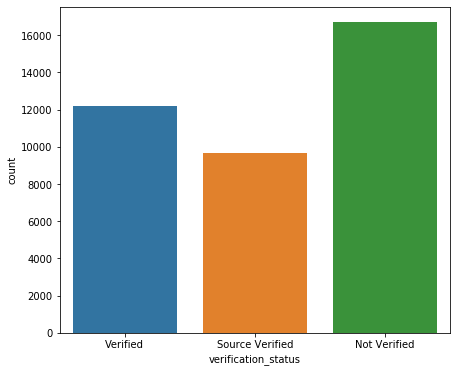

In [29]:
plt.figure(figsize=(7,6))
sns.countplot(x=updated_loan_data['verification_status'])
plt.show()

**Inference**: Most of the loans are not verified which might lead to a loss and it needs a proper drill down analysis

SEGMENTED UNIVARIATE ANALYSIS

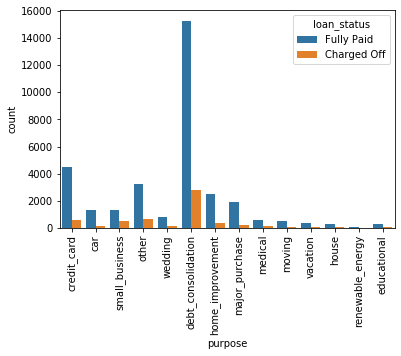

In [30]:
sns.countplot(x='purpose', hue="loan_status", data=updated_loan_data)
plt.xticks(rotation=90)
plt.show()

**Inference**:Majority of Loans are given for debt_consolidation which is very high compared to the others


**Bivariate** **Analysis**

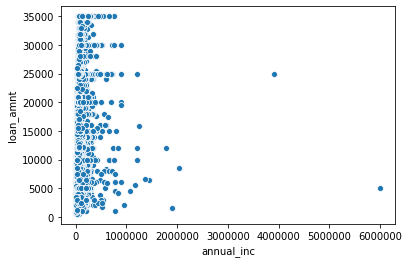

In [31]:
sns.scatterplot(x=updated_loan_data['annual_inc'],y=updated_loan_data['loan_amnt'])

**Inference**:In univariate analysis it was inferred that Applicants having annual income less than 20lakhs are availing loans. Here it was very much clear that the entire concentration of loan availing people are having income under 10 lakhs

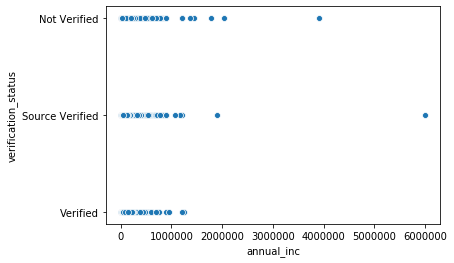

In [32]:
sns.scatterplot(x=updated_loan_data['annual_inc'],y=updated_loan_data['verification_status'])

**Inference**: People who are having an annual income less than 10 lakhs are not verified which might lead to charge off

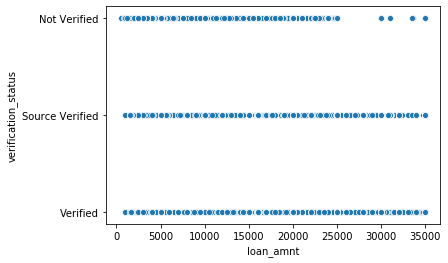

In [33]:
sns.scatterplot(x=updated_loan_data['loan_amnt'],y=updated_loan_data['verification_status'])

**Inference**: Even there are cases when the maximum loan amount cases are also not verified which might lead to charge off

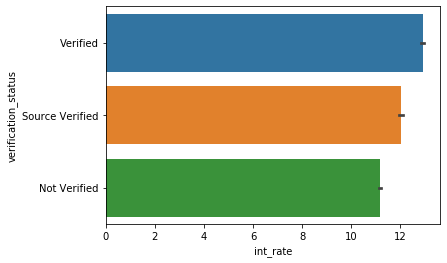

In [34]:
sns.barplot(x=updated_loan_data['int_rate'],y=updated_loan_data['verification_status'])

**Inference**: People availing loan with high interests are also not verified which might lead to charge off

In [35]:
updated_loan_data['int_rate_groups'] = pd.cut(updated_loan_data['int_rate'], bins=5,precision =0,labels=['5%-9%','9%-13%','13%-17%','17%-21%','21%-24%'])
updated_loan_data['annual_inc_groups'] = pd.cut(updated_loan_data['annual_inc'], bins=5,precision =0,labels =['3k-31k','31k-58k','58k-85k','85k-112k','112k-140k'])
updated_loan_data['funded_amnt_inv_groups'] = pd.cut(updated_loan_data['funded_amnt_inv'], bins=7,labels =['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])

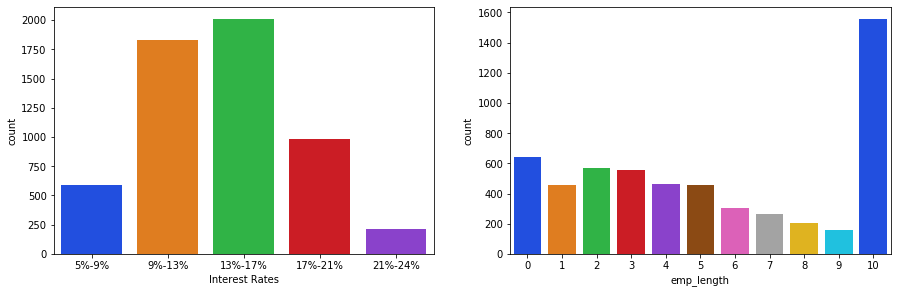

In [36]:
fig, ax = plt.subplots(figsize = (15,10))
plt.subplot(221)
sns.countplot(x='int_rate_groups', data=updated_loan_data[updated_loan_data.loan_status == 'Charged Off'],palette="bright")
plt.xlabel('Interest Rates')
plt.subplot(222)
sns.countplot(x='emp_length', data=updated_loan_data[updated_loan_data.loan_status == 'Charged Off'],palette="bright")

**Inference**:Applicants who receive interest at the rate of 13-17% and Employment_length of 10 are major defaulters


C:\Users\vardh\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


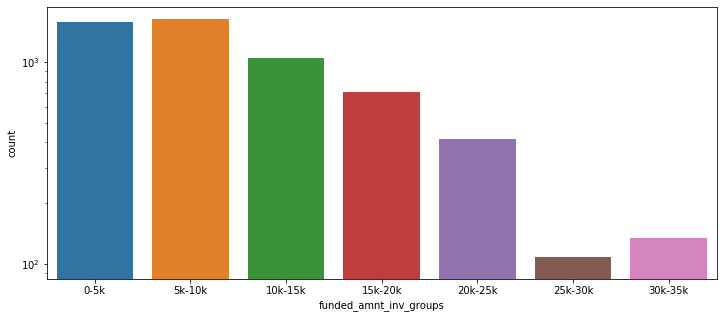

In [37]:
fig,ax = plt.subplots(figsize = (12,5))
ax.set_yscale('log')
sns.countplot(x='funded_amnt_inv_groups', data=updated_loan_data[loan_data['loan_status']=='Charged Off'],palette = "tab10")


**Inference**: Defaulters when funded investment in 5000 to 10000

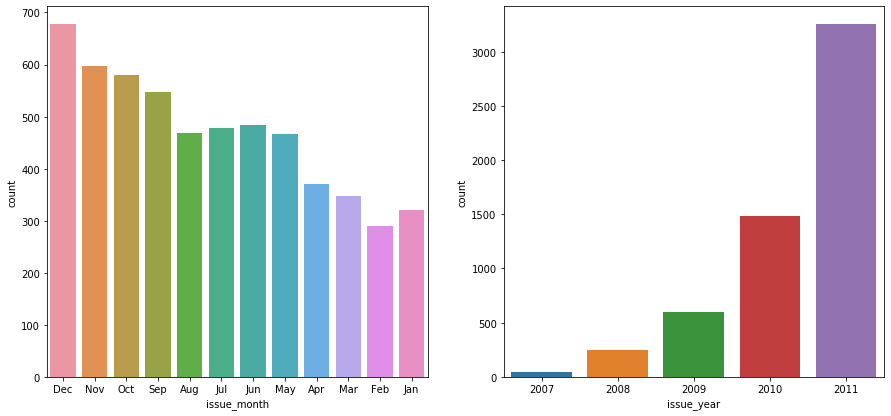

In [38]:
plt.figure(figsize=(15,15))
plt.subplot(221)
sns.countplot(x='issue_month', data=updated_loan_data[updated_loan_data['loan_status']=='Charged Off'])
plt.subplot(222)
sns.countplot(x='issue_year', data=updated_loan_data[updated_loan_data['loan_status']=='Charged Off'])

Maximum number of defaults occured when the loan was sanctioned/issued in December. Loan issued in the year 2011 also has the highest defaults


**Multivariate Analysis**

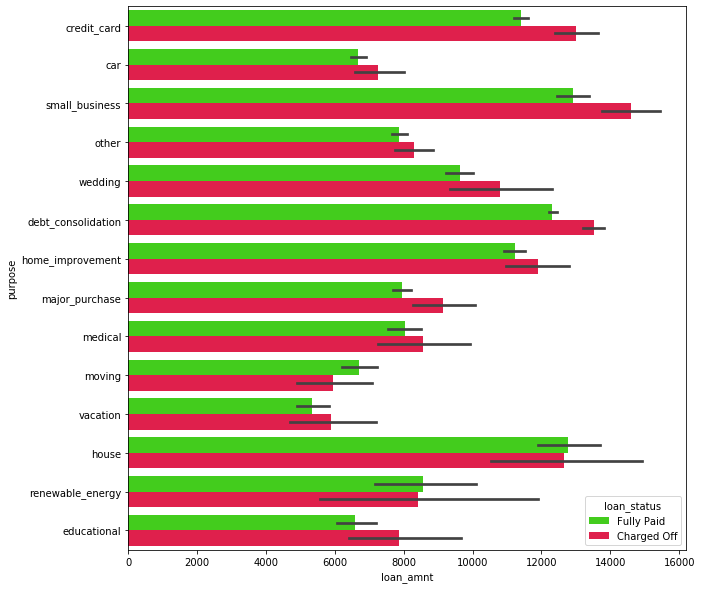

In [39]:
plt.figure(figsize=(10,10))
sns.barplot(data =updated_loan_data,x='loan_amnt', y='purpose', hue ='loan_status',palette="prism")
plt.show()

**Infernce**: Applicants are using loans for clearing their debts

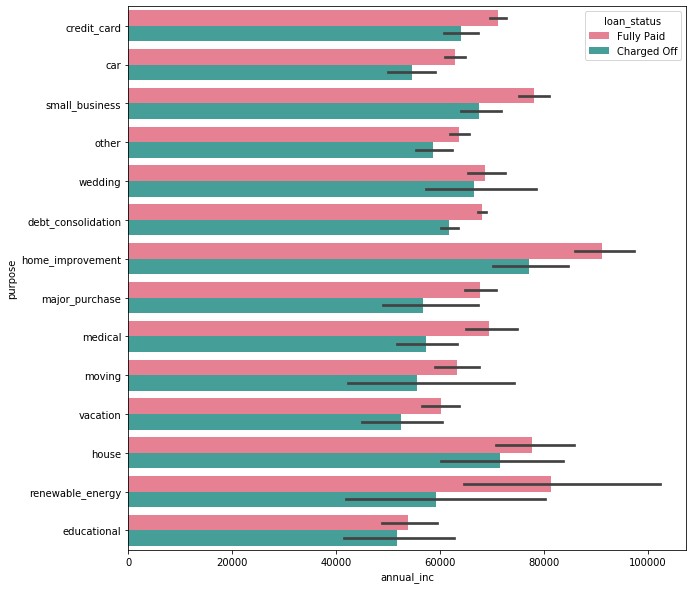

In [40]:
plt.figure(figsize=(10,10))
sns.barplot(data =updated_loan_data,x='annual_inc', y='purpose', hue ='loan_status',palette="husl")
plt.show()

**Inference**: Though the number of loans applied and defaulted are the highest in number for "debt_consolation", the annual income of those who applied isn't the highest.Applicants with higher salary mostly applied loans for "home_improvment", "house", "renewable_energy" and "small_businesses"

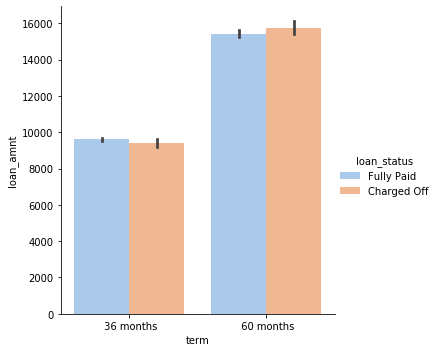

In [41]:
sns.catplot(x = 'term', y = 'loan_amnt', data = updated_loan_data,hue = 'loan_status', kind = 'bar',palette="pastel")

**Inference**: loans with higher tenure has more defaulters

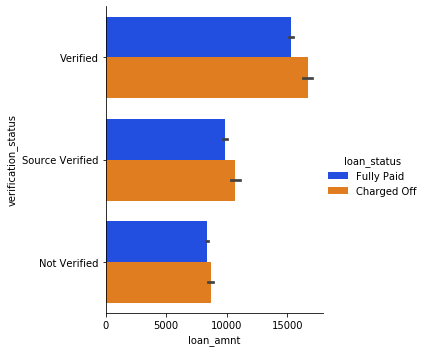

In [42]:
sns.catplot(x = 'loan_amnt', y = 'verification_status', data = updated_loan_data,hue = 'loan_status', kind = 'bar',palette="bright")

**Inference**: Defaulters are more in verified people as loan amount increases

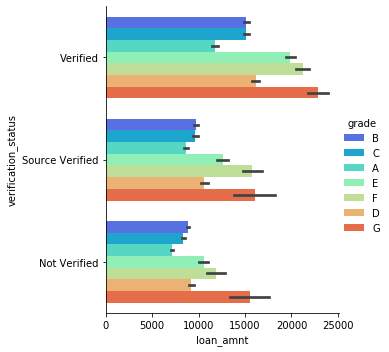

In [43]:
sns.catplot(x = 'loan_amnt', y = 'verification_status', data = updated_loan_data,hue = 'grade', kind = 'bar',palette="rainbow")

**Inference**: Defaulters are more in grade G loans as loan amount increases in verified people